<a href="https://colab.research.google.com/github/edypj/DataPrediction/blob/main/IndonesianEarthquakeVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

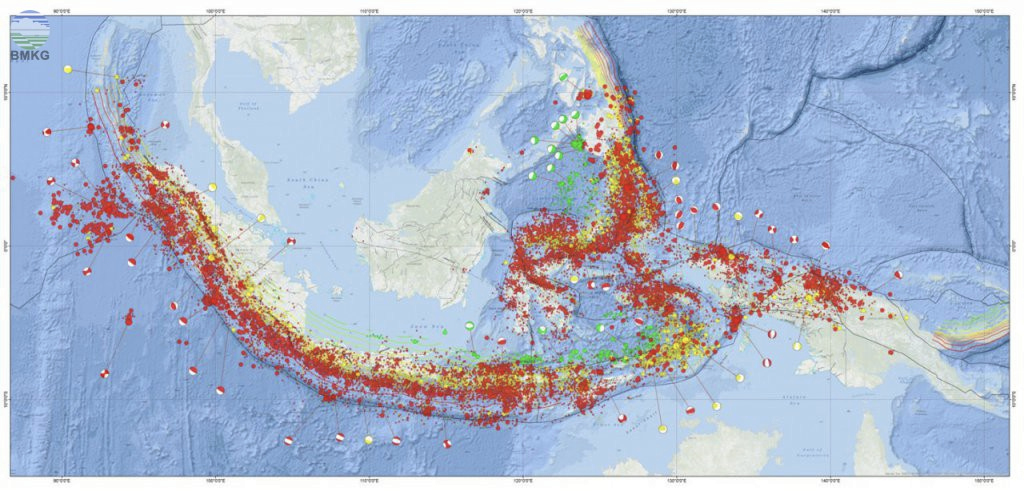

**Tentang Dataset**

Data gempa bumi yang digunakan dalam penelitian ini diperoleh dari Badan Meteorologi, Klimatologi, dan Geofisika (BMKG). Data ini mencakup kejadian gempa bumi dari 1 November 2008 hingga 26 Januari 2023.

[Klik Disini Untuk Melihat Dataset](https://github.com/kekavigi/repo-gempa)

In [10]:
import pandas as pd
from google.colab import files
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving katalog_gempa.csv to katalog_gempa.csv
User uploaded file "katalog_gempa.csv" with length 6962661 bytes


In [5]:
# Load the dataset
file_path = 'katalog_gempa.csv'  # Sesuaikan path jika berbeda
data = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the dataset
data.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Descriptive statistics
desc_stats = data.describe()
desc_stats

,lat,lon,depth,mag,strike1,dip1,rake1,strike2,dip2,rake2
count,92887.000000,92887.000000,92887.000000,92887.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000,2735.000000
mean,-3.404577,119.159707,49.009399,3.592788,170.142852,60.202121,30.358062,197.450303,56.576344,35.250018
std,4.354584,10.833202,76.761070,0.834042,88.359267,19.699252,99.957906,118.920519,21.274923,98.235894
min,-11.000000,94.020000,2.000000,1.000000,0.000000,2.300000,-180.000000,0.000000,1.500000,-180.000000
25%,-7.885000,113.170000,10.000000,3.000000,107.550000,46.950000,-28.500000,63.115000,39.400000,-19.900000
50%,-2.910000,121.160000,16.000000,3.500000,144.600000,62.300000,57.600000,240.720000,58.400000,56.500000
75%,0.140000,126.900000,54.000000,4.200000,217.500000,76.400000,100.150000,297.480000,74.700000,112.600000
max,6.000000,142.000000,750.000000,7.900000,359.200000,90.000000,180.000000,359.980000,90.000000,180.000000


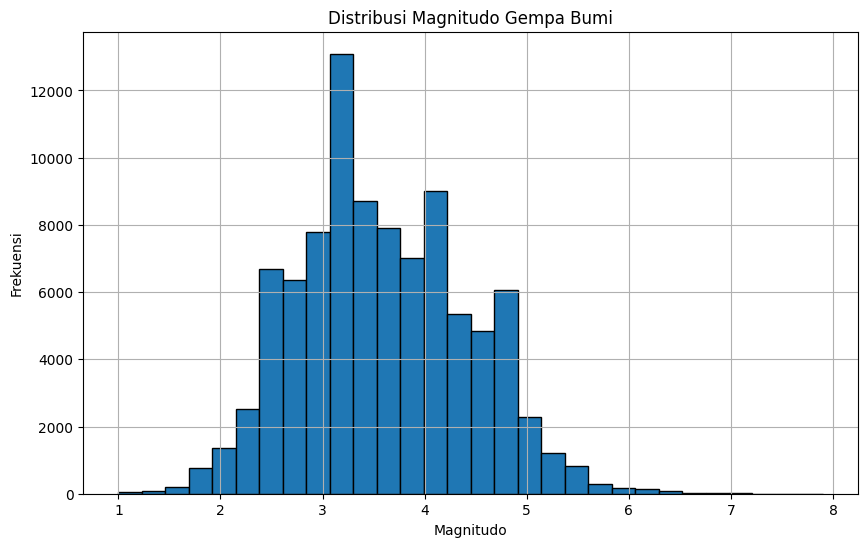

In [11]:
# Histogram of magnitudes
plt.figure(figsize=(10, 6))
plt.hist(data['mag'], bins=30, edgecolor='black')
plt.title('Distribusi Magnitudo Gempa Bumi')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

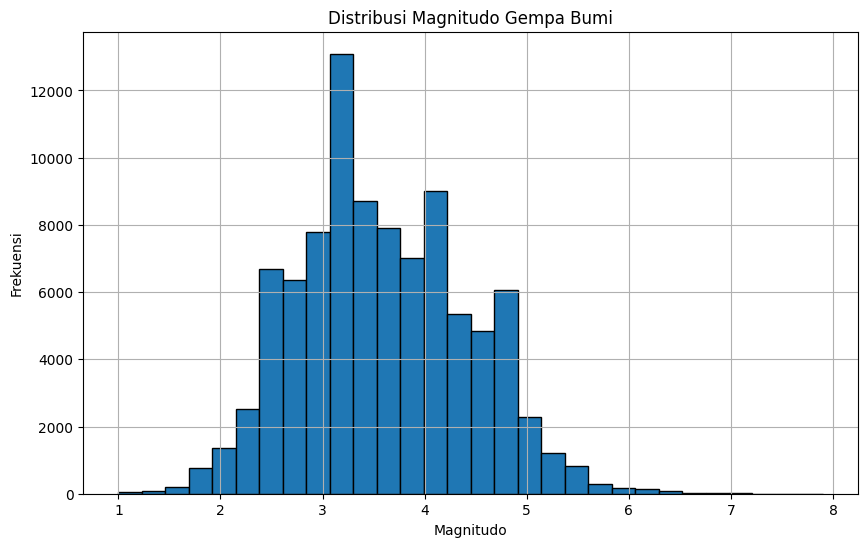

In [14]:
# Histogram of magnitudes
plt.figure(figsize=(10, 6))
plt.hist(data['mag'], bins=30, edgecolor='black')
plt.title('Distribusi Magnitudo Gempa Bumi')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

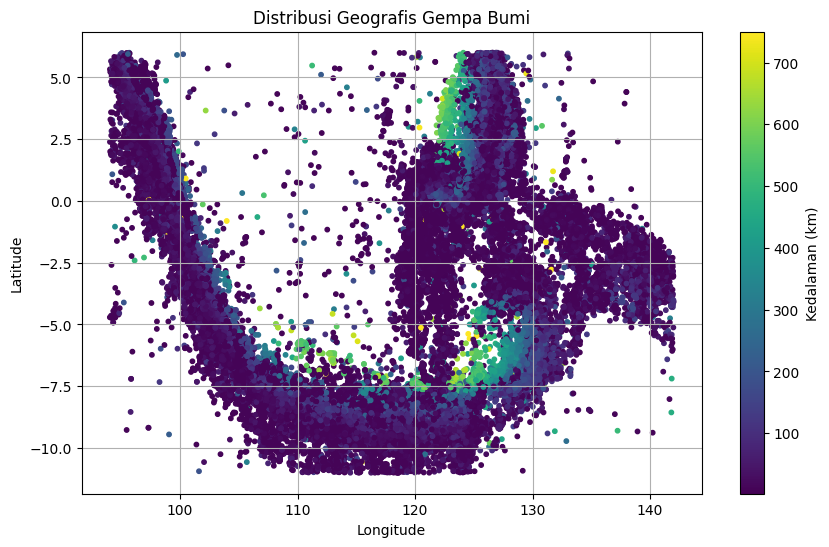

In [13]:
# Scatter plot of earthquake locations
plt.figure(figsize=(10, 6))
plt.scatter(data['lon'], data['lat'], c=data['depth'], cmap='viridis', s=10)
plt.colorbar(label='Kedalaman (km)')
plt.title('Distribusi Geografis Gempa Bumi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

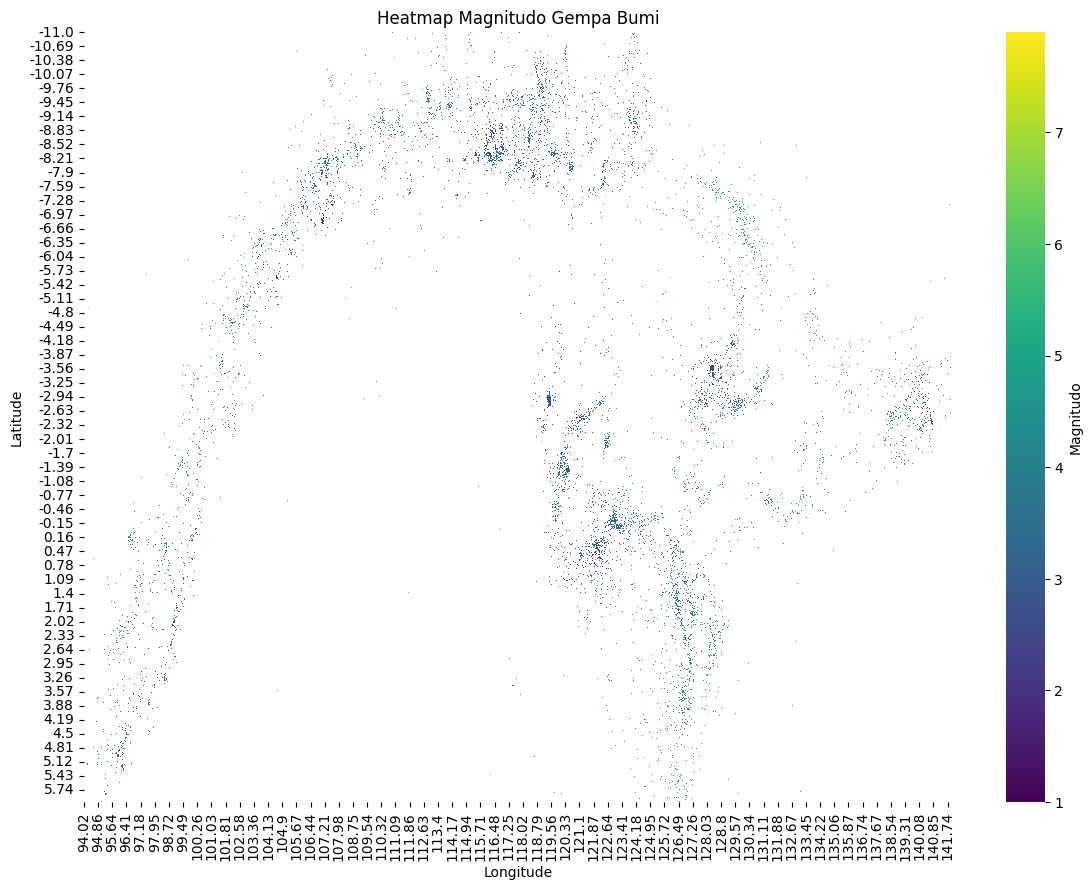

In [12]:
# Heatmap of magnitudes
heatmap_data = data.pivot_table(values='mag', index='lat', columns='lon', aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Magnitudo'})
plt.title('Heatmap Magnitudo Gempa Bumi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


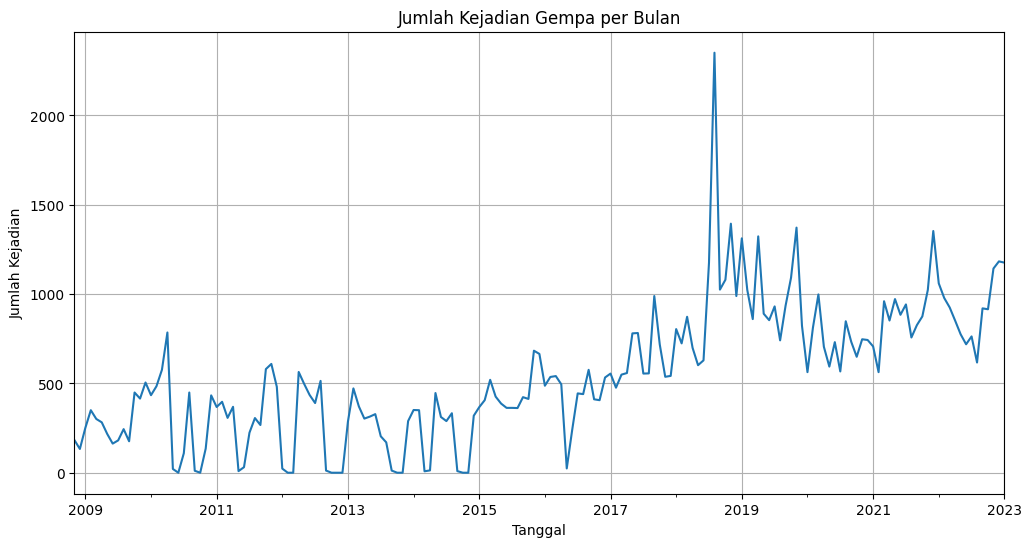

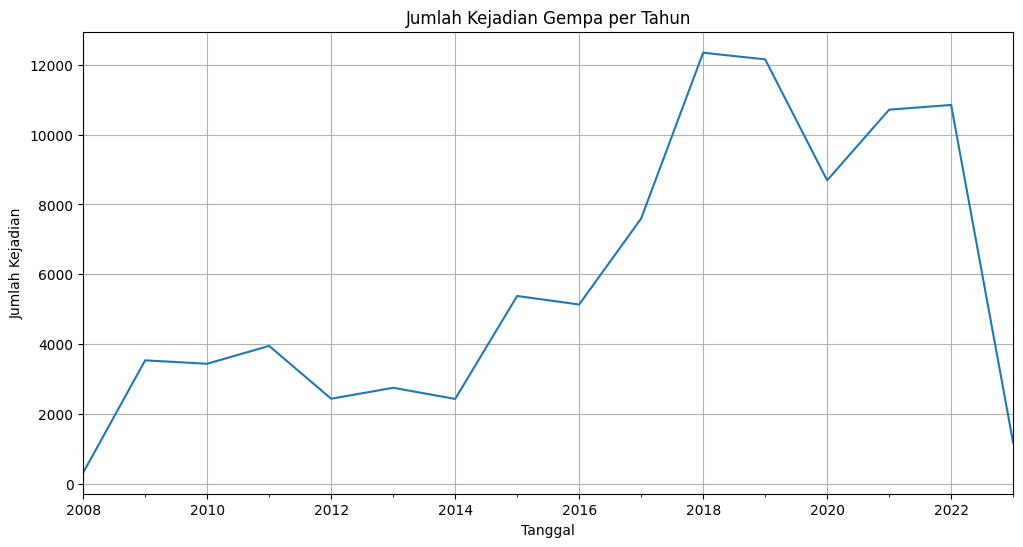

In [15]:
# Time series analysis
data['tgl'] = pd.to_datetime(data['tgl'])
data.set_index('tgl', inplace=True)
monthly_data = data['mag'].resample('M').count()
yearly_data = data['mag'].resample('Y').count()

# Monthly time series
plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Jumlah Kejadian Gempa per Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kejadian')
plt.grid(True)
plt.show()

# Yearly time series
plt.figure(figsize=(12, 6))
yearly_data.plot()
plt.title('Jumlah Kejadian Gempa per Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kejadian')
plt.grid(True)
plt.show()


In [23]:
!pip install folium --quiet
import folium


# Display the first few rows of the dataset
data.head()




,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
tgl,,,,,,,,,,,,
2008-11-01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Display the column names to verify
print(data.columns)

Index(['ot', 'lat', 'lon', 'depth', 'mag', 'remark', 'strike1', 'dip1',
       'rake1', 'strike2', 'dip2', 'rake2'],
      dtype='object')


In [27]:
# Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Define depth categories
def categorize_depth(depth):
    if depth < 50:
        return 'green'
    elif 50 <= depth < 100:
        return 'orange'
    else:
        return 'red'

# Apply depth categories
data['depth_category'] = data['depth'].apply(categorize_depth)

# Display the first few rows of the dataset to verify
data.head()



,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,depth_category
tgl,,,,,,,,,,,,,
2008-11-01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,green
2008-11-01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN,green
2008-11-01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,red
2008-11-01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,green
2008-11-01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN,orange


In [28]:
# Initialize a Folium map centered around the mean coordinates of the dataset
map_center = [data['lat'].mean(), data['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)

# Add earthquake data points to the map with depth categories
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        popup=f"Magnitude: {row['mag']}, Depth: {row['depth']} km",
        color=row['depth_category'],
        fill=True,
        fill_color=row['depth_category']
    ).add_to(mymap)

# Display the map in Google Colab
mymap._repr_html_()


In [29]:
# Save the map as an HTML file
map_file_path = 'earthquake_map.html'
mymap.save(map_file_path)

In [30]:
# Provide a link to download the map file
from google.colab import files
files.download(map_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Hasil Visualisasi yang telah Di Download**

1.   Kedalaman < 50 = Hijau
2.   Kedalaman 50 <= depth < 100 = Orange
3.   Kedalaman 100 < = Merah



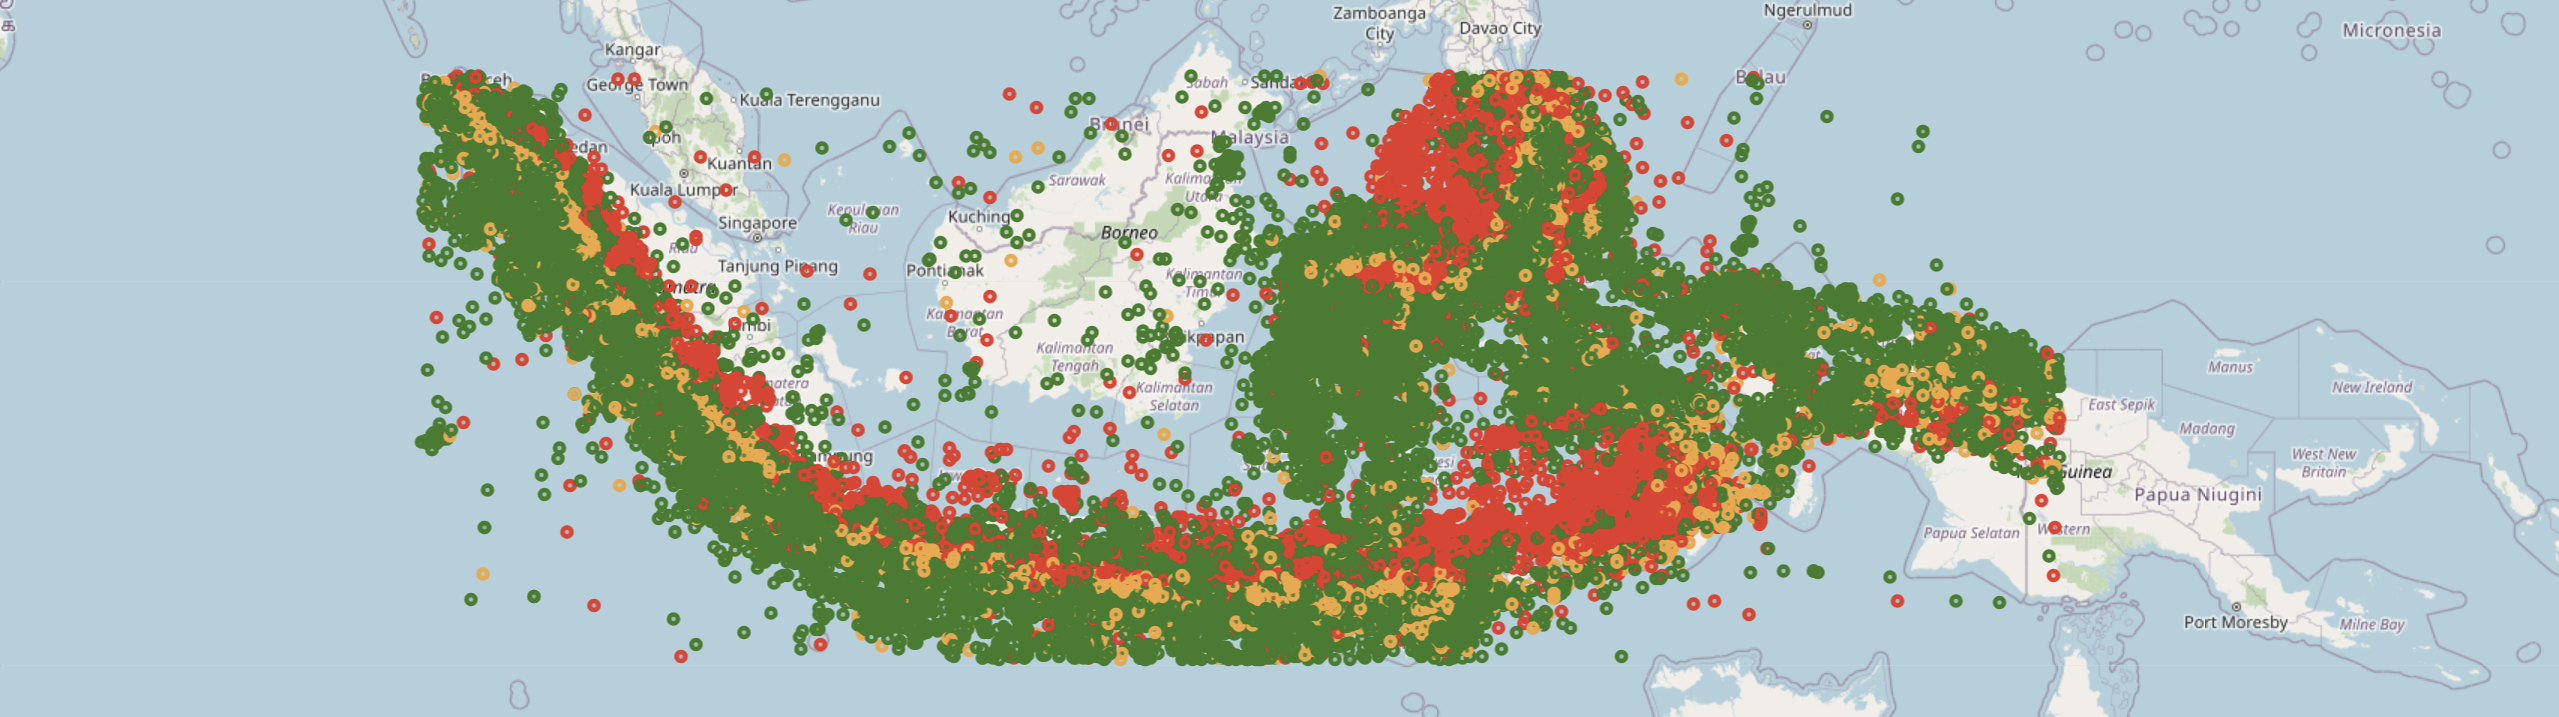

**Kedalaman < 50 = Hijau**

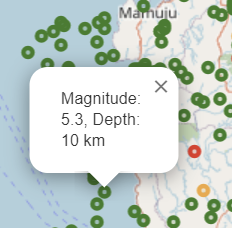

**Kedalaman 50 <= depth < 100 = Orange**

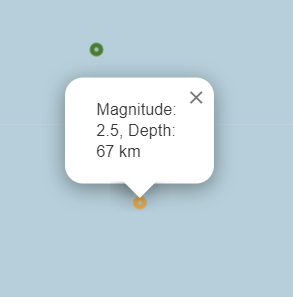

**Kedalaman 100 < = Merah**

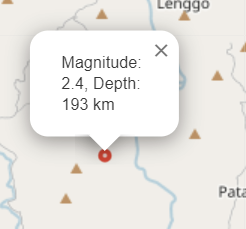